In [94]:
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
weather_api_key = ""
g_key = ""

In [95]:
# Construct city list
with open('city.list.json', 'r',encoding='utf-8') as jsonfile:
    jsndata = json.load(jsonfile)

ids = []
nam = []
country = []
lat = []
lon = []

for i in range(len(jsndata)):
    ids.append(jsndata[i]['id'])
    nam.append(jsndata[i]['name'].lower())
    country.append(jsndata[i]['country'])
    # need to lower the letter case because citipy uses lower case letters
    lat.append(jsndata[i]['coord']['lat'])
    lon.append(jsndata[i]['coord']['lon'])
    
dftemp = pd.DataFrame({'id':ids,'City':nam,'Country':country,'Lat':lat,'Lng':lon})
dftemp.to_csv("output_data/allcities.csv", index=False, header=True)

In [96]:
# Read dfcities.csv file

dfcities = pd.read_csv("output_data/allcities.csv", encoding="utf-8")
dfcities = dfcities.set_index('City')
dfcities.head()

,id,Country,Lat,Lng
City,,,,
hurzuf,707860,UA,44.549999,34.283333
novinki,519188,RU,55.683334,37.666668
gorkhā,1283378,NP,28.000000,84.633331
state of haryāna,1270260,IN,29.000000,76.000000
holubynka,708546,UA,44.599998,33.900002


In [97]:
# Select 500 unique cities and save the data into dfselected.csv

ncities = 500
namsel = []
idsel = []
countrysel = []
latsel = []
lonsel = []
i = 0
while(i < ncities):
    i = i+1
    latitude = random.uniform(-90.0,90.0)
    longitude = random.uniform(-180.0,180.0)
    city = citipy.nearest_city(latitude,longitude)
    try:
        id = int(dfcities.loc[city.city_name]['id'])
        try:
            itemp = idsel.index(id)
            i = i - 1
        except:
            idsel.append(id)
            namsel.append(city.city_name)
            countrysel.append(dfcities.loc[city.city_name]['Country'])
            latsel.append(dfcities.loc[city.city_name]['Lat'])
            lonsel.append(dfcities.loc[city.city_name]['Lng'])
    except:
        i = i - 1

dftemp = pd.DataFrame({'City':namsel,'id':idsel,'Country':countrysel,'Lat':latsel,'Lng':lonsel})
dftemp.to_csv("output_data/dfselected.csv", index=False, header=True)

500
                City       id Country        Lat         Lng
0          dalbandin  1180729      PK  28.894699   64.410088
1  sao joao da barra  3448903      BR -21.640280  -41.051109
2        port alfred   964432      ZA -33.590569   26.891041
3               hilo  5855927      US  19.729719 -155.089996
4             pouebo  2138607      NC -20.400000  164.566666


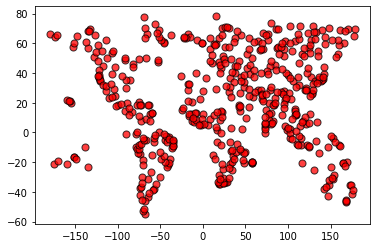

In [98]:
# Read dfselected.csv file into dataframe, previous cells are not required to run once the dfselected.csv is saved
# generate scatter plot to make sure that cities are distributed throughout the globe

dfselected = pd.read_csv("output_data/dfselected.csv", encoding="utf-8")

# print total # of selected cities
print(len(dfselected)) 

# check if the dataframe has the right format
print(dfselected.head())

# generate the scatter plot to make sure that the cities are evenly distributed throughout the globe
plt.scatter(dfselected["Lng"],dfselected["Lat"],marker="o",facecolors="red",edgecolors="black",s=50,alpha=0.75)

In [99]:
# Request weather informatiton for the selected cities and save into a json file weatherlist.json

jsnlist = []

i = 0
waitingtime = 0
ncities = len(dfselected)
while i < ncities:
    id = dfselected['id'][i]
    url = f"http://api.openweathermap.org/data/2.5/forecast?id={id}&units=imperial&APPID={weather_api_key}"
    jsn = requests.get(url).json()
    try:
        print('City-{0}: {1}'.format(i,jsn['city']['name']))
        jsnlist.append(jsn)
        i = i + 1
        waitingtime = 0
    except:
        waitingtime = waitingtime + 1
        print(f"Waiting {waitingtime} seconds")
        time.sleep(1)
    
with open('output_data/weatherlist.json', 'w') as jsonfile:
    json.dump(jsnlist, jsonfile)

City-0: Dalbandin
City-1: Sao Joao da Barra
City-2: Port Alfred
City-3: Hilo
City-4: Pouebo
City-5: Dwarka
City-6: Hasaki
City-7: Puquio
City-8: Avarua
City-9: Lebu
City-10: Baykit
City-11: Cape Town
City-12: Ushuaia
City-13: Tiksi
City-14: Neryungri
City-15: Bambanglipuro
City-16: Yenagoa
City-17: Kloulklubed
City-18: Punta Arenas
City-19: Tuktoyaktuk
City-20: Mogadishu
City-21: Zhangye
City-22: Fort Nelson
City-23: Petropavlovsk-Kamchatsky
City-24: Qaanaaq
City-25: Along
City-26: Susehri
City-27: Sitka
City-28: Puerto Ayora
City-29: Arraial do Cabo
City-30: Denpasar
City-31: Macapa
City-32: Khorramshahr
City-33: Pangnirtung
City-34: Boyolangu
City-35: Klaksvik
City-36: Rawson
City-37: Hermanus
City-38: Borujerd
City-39: Narsaq
City-40: Champerico
City-41: Clyde River
City-42: Kinwat
City-43: Beidao
City-44: Rikitea
City-45: Pacific Grove
City-46: Bubaque
City-47: Upernavik
City-48: Chunhuhub
City-49: Kalmunai
City-50: Shimoda
City-51: Cap Malheureux
City-52: Deputatsky
City-53: Husav

City-429: Ukhta
City-430: Mehamn
City-431: Jutai
City-432: Chapais
City-433: Fasa
City-434: Presidencia Roque Saenz Pena
City-435: Mitsamiouli
City-436: Grand Gaube
City-437: Gazimurskiy Zavod
City-438: Canico
City-439: Aswan
City-440: Sisimiut
City-441: Laas
City-442: Les Cayes
City-443: Dondo
City-444: San Rafael del Sur
City-445: Polunochnoye
City-446: Phalaborwa
City-447: Ettenheim
City-448: Poddorye
City-449: Lerik
City-450: Quelimane
City-451: Grande Prairie
City-452: Ca Mau
City-453: Golyshmanovo
City-454: Borogontsy
City-455: Arinos
City-456: Nueva Loja
City-457: Sungairaya
City-458: Kamakwie
City-459: Mzimba
City-460: Ismailia
City-461: Turangi
City-462: Araceli
City-463: La Ronge
City-464: Chernyshkovskiy
City-465: Jiaojiang
City-466: Kulhudhuffushi
City-467: Maiduguri
City-468: Clearlake
City-469: Kashgar
City-470: Vienenburg
City-471: Rio Gallegos
City-472: Zrenjanin
City-473: Severo-Yeniseyskiy
City-474: Xining
City-475: Asau
City-476: Natyrbovo
City-477: Viedma
City-478: 

In [100]:
# Read weatherlist.json and dfselected.csv and create cities.csv

with open('output_data/weatherlist.json', 'r',encoding='utf-8') as jsonfile:
    weatherlist = json.load(jsonfile)

# Read again the selected cities just in case if the notebook is opened again
cities = pd.read_csv("output_data/dfselected.csv", encoding="utf-8")
del cities['id']

cities['Date'] = [weatherlist[i]['list'][0]['dt'] for i in range(len(weatherlist))]
cities['Cloudiness'] = [weatherlist[i]['list'][0]['clouds']['all'] for i in range(len(weatherlist))]
cities['Humidity'] = [weatherlist[i]['list'][0]['main']['humidity'] for i in range(len(weatherlist))]
cities['Max Temp'] = [weatherlist[i]['list'][0]['main']['temp_max'] for i in range(len(weatherlist))]
cities['Wind Speed'] = [weatherlist[i]['list'][0]['wind']['speed'] for i in range(len(weatherlist))]

# Save the result into cities.csv file
cities.to_csv("output_data/cities.csv", index=False, header=True)

In [101]:
# read the cities.csv to create dataframe, previous cells are not needed to be executed as long as cities.csv was created

cities = pd.read_csv("output_data/cities.csv", encoding="utf-8")
cities.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,dalbandin,PK,28.894699,64.410088,1578960000,0,67,36.19,9.80
1,sao joao da barra,BR,-21.640280,-41.051109,1578960000,100,92,76.21,9.42
2,port alfred,ZA,-33.590569,26.891041,1578960000,80,90,72.36,17.74
3,hilo,US,19.729719,-155.089996,1578960000,100,80,72.61,8.61
4,pouebo,NC,-20.400000,164.566666,1578960000,90,54,84.70,9.51


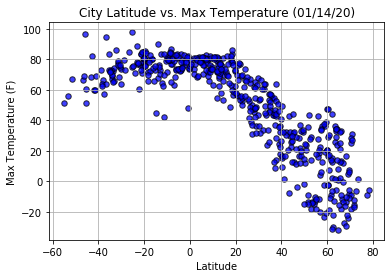

In [102]:
# import time
# convert datetime to 10 digit value
# my_time = time.strptime("09/22/19", "%m/%d/%y")
# timevalue = time.mktime(my_time)
# print(timevalue)

ts = time.gmtime(cities['Date'][0])
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts))
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Max Temp'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/fig1.png")
plt.show()

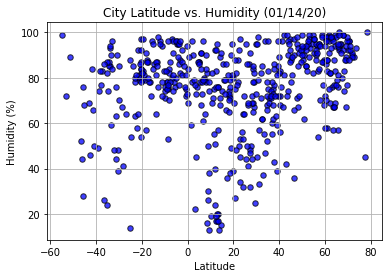

In [103]:
ts = time.gmtime(cities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Humidity'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig2.png")
plt.show()

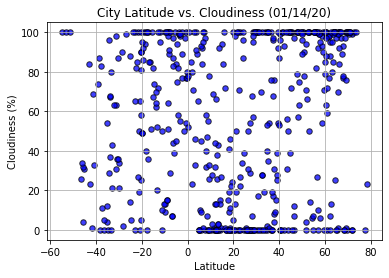

In [104]:
ts = time.gmtime(cities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig3.png")
plt.show()

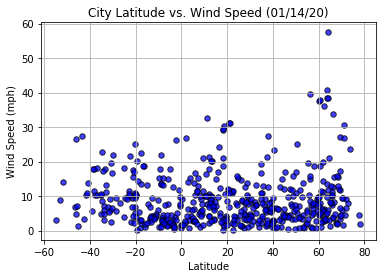

In [105]:
ts = time.gmtime(cities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/fig4.png")
plt.show()

In [106]:
nothern = cities.loc[cities["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = cities.loc[cities["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [107]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

The r-squared is: -0.8738166710415939


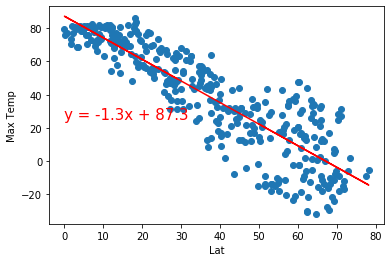

In [108]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

The r-squared is: 0.29022285352135363


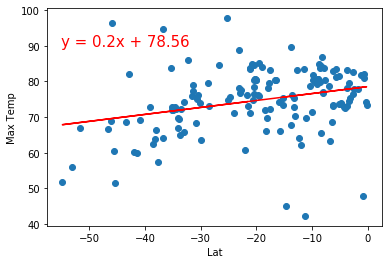

In [109]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

The r-squared is: 0.4322777889759341


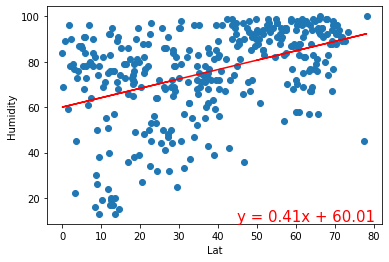

In [110]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: 0.3666473508670676


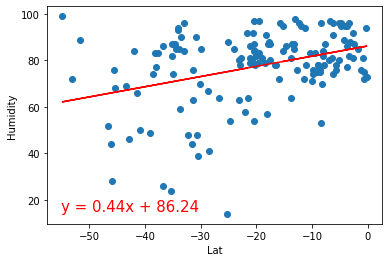

In [111]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

The r-squared is: 0.3623971034993301


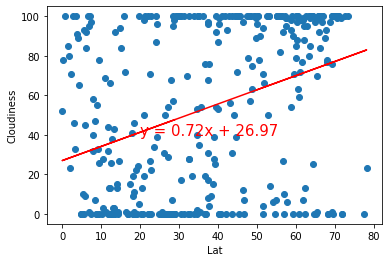

In [112]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

The r-squared is: 0.28567647975768534


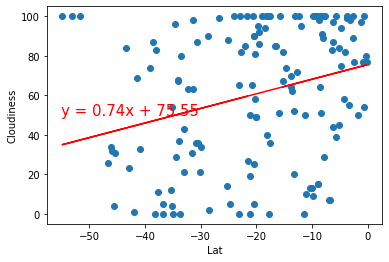

In [113]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

The r-squared is: 0.09969112764272546


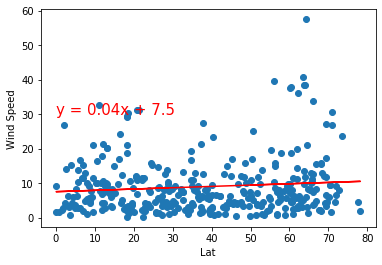

In [114]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)

The r-squared is: -0.27632378637844


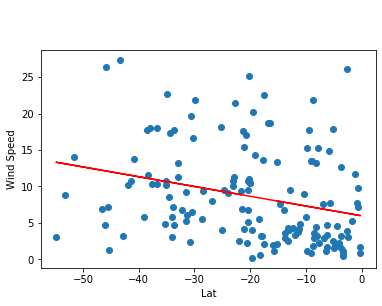

In [115]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)

# Observations
1. Temperature decrease when the latitude is away from the equator
2. No relationship between humidity and latitude
3. Wind speed seems to be more near arctic and antarctic